In [ ]:
import pandas as pd
import random
from typing import List
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
Genome = List[int] # Isinya Biner dari pemilihan features
Population = List[Genome] #Isinya kumpulan Genome (populasi)

In [ ]:
dataset = pd.read_csv('train_val.data', header=None)
test = pd.read_csv('test.data', header=None)

In [ ]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,859471,B,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,...,10.310,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
1,873593,M,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,...,26.680,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
2,859196,B,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,...,10.010,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
3,88466802,B,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,...,12.250,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
4,858970,B,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,...,11.020,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,859711,B,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
451,863031,B,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
452,8910721,B,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
453,908489,M,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


In [ ]:
dataset.drop(columns=0, inplace=True)
test.drop(columns=0, inplace=True)

In [ ]:
dataset

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,B,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,...,10.310,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
1,M,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,...,26.680,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
2,B,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,...,10.010,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
3,B,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,...,12.250,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
4,B,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,...,11.020,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,B,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
451,B,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
452,B,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
453,M,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


# <font color = orange> Fungsi-Fungsi </font>

**Pembuatan dan penjelasan fungsi-fungsi untuk menjalankan Algoritma Genetika**

---
1. generate_genome (Menghasilkan list fitur-fitur yang dipakai untuk klasifikasi)
2. generate_population (Menghasilkan individu-individu (populasi) dari genome yang di-generate)
3. fitness (***Return*** hasil ***accuracy*** setiap genome (***features*** yang digenerate))
4. crossover (***Return*** dua anak yang telah disilangkan)
5. mutation (***Return*** genome yang sudah termutasi)
6. roulette_wheel_selection (***Return parents*** untuk diperkawinkan)

**Generate Genome**

---

In [ ]:
def generate_genome(panjang: int) -> Genome:
    """panjang: panjang fitur dataset supaya genome memiliki panjang yang sesuai"""
    return [random.randint(0, 1) for _ in range(panjang)]

**Generate Populasi**

---

In [ ]:
def generate_population(jml_pop: int, panjang: int) -> Population:
    """jml_pop: jumlah populasi yang akan dibuat
       panjang: panjang genome yang akan dibuat"""
    return [generate_genome(panjang) for _ in range(jml_pop)]

In [ ]:
## Kalau mau pakai Keras, uncomment bagian ini
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# def create_keras_model(input_dim):
#     model = Sequential([
#         Dense(64, activation='relu', input_shape=(input_dim,)),
#         Dense(32, activation='relu'),
#         Dense(1, activation='sigmoid')  # output binary classification
#     ])
#     model.compile(optimizer='adam',
#                   loss='binary_crossentropy',
#                   metrics=['accuracy'])
#     return model

**Fitness**

---

In [ ]:
def fitness(genome: Genome,
            X_train: np.ndarray,
            y_train: np.ndarray,
            X_val: np.ndarray,
            y_val: np.ndarray)-> float:
    fitur_aktif = []
    for i in range(len(genome)):
        if genome[i] == 1:
            fitur_aktif.append(i)

    if len(fitur_aktif) == 0:
        return 0.0

    X_train_selected = X_train[:, fitur_aktif]
    X_val_selected = X_val[:, fitur_aktif]

    ## Model KNN
    # model = KNeighborsClassifier(n_neighbors=5)
    # model.fit(X_train_selected, y_train)

    # y_pred = model.predict(X_val_selected)
    # return accuracy_score(y_val, y_pred)

    ## Model XGBoost
    model = XGBClassifier(eval_metric='logloss')
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_val_selected)
    return accuracy_score(y_val, y_pred)



**Crossover**

---

In [ ]:
def crossover(parent1: Genome, parent2: Genome) -> tuple[Genome, Genome]:
    if len(parent1) != len(parent2):
        raise ValueError("Kedua parent harus punya panjang yang sama")

    panjang = len(parent1)
    titik_potong = random.randint(1, panjang - 1)

    child1 = parent1[:titik_potong] + parent2[titik_potong:]
    child2 = parent2[:titik_potong] + parent1[titik_potong:]

    return child1, child2

**Mutasi**

---

In [ ]:
def mutasi(genome: Genome, mutation_rate: float = 0.01) -> Genome:
    mutated = [
        bit if random.random() > mutation_rate else 1 - bit
        for bit in genome
    ]

    if sum(mutated) == 0:
        idx = random.randint(0, len(genome) - 1)
        mutated[idx] = 1
    return mutated

**Roulette Wheel Selection**

---

In [ ]:
def roulette_wheel_selection(population, fitnesses, n_select):
    total_fitness = sum(fitnesses)
    if total_fitness == 0:
        # Kalau semua fitness = 0, pilih acak
        return random.choices(population, k=n_select)

    probabilities = [f / total_fitness for f in fitnesses]

    cumulative = []
    cumsum = 0
    for p in probabilities:
        cumsum += p
        cumulative.append(cumsum)

    # Pilih individu berdasarkan probabilitas
    selected = []
    for _ in range(n_select):
        r = random.random()
        for i, c in enumerate(cumulative):
            if r <= c:
                selected.append(population[i])
                break

    return selected

**Genetic Algorithm**

---

In [ ]:
def genetic_algorithm(X_train, y_train, X_val, y_val, panjang_genome, jml_generasi, jml_pop):
    population = generate_population(jml_pop, panjang_genome)

    for generasi in range(jml_generasi):
        fitnesses = [fitness(g, X_train, y_train, X_val, y_val) for g in population]

        print(f"Generasi {generasi+1}: Best fitness = {max(fitnesses):.4f}")

        parents = roulette_wheel_selection(population, fitnesses, jml_pop)

        next_population = []
        for i in range(0, jml_pop, 2):
            p1, p2 = parents[i], parents[i+1]
            c1, c2 = crossover(p1, p2)
            c1 = mutasi(c1)
            c2 = mutasi(c2)
            next_population.extend([c1, c2])

        population = next_population

    final_fitnesses = [fitness(g, X_train, y_train, X_val, y_val) for g in population]
    best_genome = population[final_fitnesses.index(max(final_fitnesses))]
    return best_genome, max(final_fitnesses)

# <font color = #c1e62e>***Splitting***</font>

In [ ]:
X_train = dataset.drop(columns=[1])  # Pastikan hapus kolom label (kolom 1)
y_train = dataset[1]

In [ ]:
X_test = test.drop(columns=[1])
y_test = test[1]

In [ ]:
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.2,
    random_state=42
)

# <span style="color: rgb(37, 150, 165)">***Scaling***</span>

In [ ]:
scaler = StandardScaler()
X_train_split_scaled = scaler.fit_transform(X_train_split)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# <span style="color: rgb(130, 170, 36)">***Encoding***</span>

In [ ]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train_split)
y_val_encoded = le.transform(y_val)

y_train_full_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [ ]:
## Versi Non Scaling
# x_train_split = X_train_split.to_numpy()
# x_val = X_val.to_numpy()

y_train_np = y_train_encoded
y_val_np = y_val_encoded


# <span style="color: rgb(245, 12, 12)">***Feature Engineering***</span>

In [ ]:
## Versi Non Scaling
# best_genome, best_acc = genetic_algorithm(
#     x_train_split, y_train_np, x_val, y_val_np,
#     panjang_genome=x_train_split.shape[1],
#     n_generasi=100,
#     pop_size=20
# )

best_genome, best_acc = genetic_algorithm(
    X_train_split_scaled,
    y_train_np,
    X_val_scaled,
    y_val_np,
    panjang_genome=X_train_split_scaled.shape[1],
    jml_generasi=100,
    jml_pop=20
)

print("Best selected features:", best_genome)
print(f"Best accuracy: {best_acc*100:.2f}%")

Generasi 1: Best fitness = 0.9670
Generasi 2: Best fitness = 0.9670
Generasi 3: Best fitness = 0.9670
Generasi 4: Best fitness = 0.9670
Generasi 5: Best fitness = 0.9670
Generasi 6: Best fitness = 0.9670
Generasi 7: Best fitness = 0.9670
Generasi 8: Best fitness = 0.9780
Generasi 9: Best fitness = 0.9780
Generasi 10: Best fitness = 0.9780
Generasi 11: Best fitness = 0.9780
Generasi 12: Best fitness = 0.9780
Generasi 13: Best fitness = 0.9780
Generasi 14: Best fitness = 0.9780
Generasi 15: Best fitness = 0.9670
Generasi 16: Best fitness = 0.9670
Generasi 17: Best fitness = 0.9560
Generasi 18: Best fitness = 0.9670
Generasi 19: Best fitness = 0.9670
Generasi 20: Best fitness = 0.9780
Generasi 21: Best fitness = 0.9670
Generasi 22: Best fitness = 0.9780
Generasi 23: Best fitness = 0.9670
Generasi 24: Best fitness = 0.9670
Generasi 25: Best fitness = 0.9670
Generasi 26: Best fitness = 0.9780
Generasi 27: Best fitness = 0.9780
Generasi 28: Best fitness = 0.9780
Generasi 29: Best fitness = 0

<font color = violet><h3>***KNNClassifier***</font><br>

In [ ]:
# fitur_aktif = []
# for i in range(len(best_genome)):
#     if best_genome[i] == 1:
#         fitur_aktif.append(i)


# x_train_full = X_train.to_numpy()[:, fitur_aktif]
# x_test_selected = X_test.to_numpy()[:, fitur_aktif]

# model = KNeighborsClassifier(n_neighbors=5)
# model.fit(x_train_full, y_train_full_encoded)

# y_test_pred = model.predict(x_test_selected)

# test_acc = accuracy_score(y_test_encoded, y_test_pred)
# print("Akurasi pada data test:", test_acc)

<font color = violet><h3>***XGBoostClassifier***</font><br>

In [ ]:
fitur_aktif = []
for i in range(len(best_genome)):
    if best_genome[i] == 1:
        fitur_aktif.append(i)


x_train_full = X_train.to_numpy()[:, fitur_aktif]
x_test_selected = X_test.to_numpy()[:, fitur_aktif]

model = XGBClassifier(eval_metric='logloss')
model.fit(x_train_full, y_train_full_encoded)

y_test_pred = model.predict(x_test_selected)

test_acc = accuracy_score(y_test_encoded, y_test_pred)
print("Akurasi pada data test:", test_acc)

Akurasi pada data test: 0.9736842105263158


In [ ]:
print("Classification Report (Test):")
print(classification_report(y_test_encoded, y_test_pred))

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



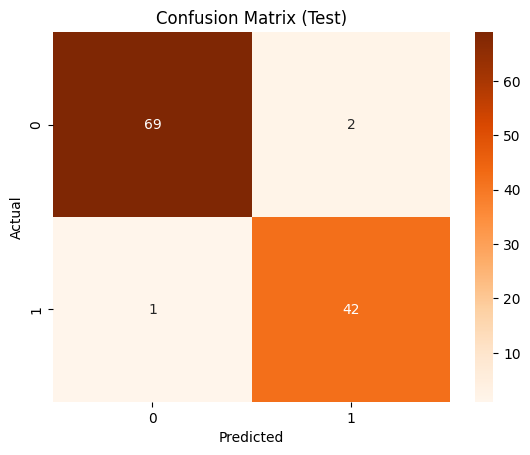

In [ ]:
cm_test = confusion_matrix(y_test_encoded, y_test_pred)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix (Test)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()